In [2]:
import csv
import numpy as np

custom_relu = 'test_data_relu.csv'
custom_sigmoid = 'test_data_sigma.csv'

pytorch_relu = 'model_cross_entropy_relu_mandag.csv'
pytorch_sigmoid = 'model_cross_entropy_sigmoid.csv'

A = custom_relu
B = custom_sigmoid

A_name = "Custom ReLU"
B_name = "Custom Sigmoid"

with open(A, newline='', ) as csvfile:
    reader = csv.reader(csvfile)

    progress = []
    timings = []

    for row in reader:
        progress.append(float(row[0]))
        timings.append(float(row[1]))


    progress = np.array_split(progress[1:], 33)
    timings = np.array_split(timings[1:], 33)

with open(B, newline='', ) as csvfile:
    reader = csv.reader(csvfile)

    progressB = []
    timingsB = []

    for row in reader:
        progressB.append(float(row[0]))
        timingsB.append(float(row[1]))

    progressB = np.array_split(progressB[1:], 33)
    timingsB = np.array_split(timingsB[1:], 33)

with open(pytorch_relu, newline='', ) as csvfile:
    reader = csv.reader(csvfile)

    progressPytorchRelu = []
    timingsPytorchRelu = []

    for row in reader:
        progressPytorchRelu.append(float(row[0]))
        timingsPytorchRelu.append(float(row[1]))


    progressPytorchRelu = np.array_split(progressPytorchRelu[1:], 33)
    timingsPytorchRelu = np.array_split(timingsPytorchRelu[1:], 33)

with open(pytorch_sigmoid, newline='', ) as csvfile:
    reader = csv.reader(csvfile)

    progressPytorchSigmoid = []
    timingsPytorchSigmoid = []

    for row in reader:
        progressPytorchSigmoid.append(float(row[0]))
        timingsPytorchSigmoid.append(float(row[1]))

    progressPytorchSigmoid = np.array_split(progressPytorchSigmoid[1:], 33)
    timingsPytorchSigmoid = np.array_split(timingsPytorchSigmoid[1:], 33)


In [3]:
totalTimes = []
for times in timings:
	totalTimes.append(sum(times))

timeMean = np.mean(totalTimes)
print("Average time per run:", timeMean)
print("variance in time per run:", np.var(totalTimes))

d = 1.96 * np.sqrt(np.var(totalTimes)/33)
confidenceInterval = [timeMean - d, timeMean + d]

print("Confidence interval for time:", confidenceInterval)

Average time per run: 80.30050426540953
variance in time per run: 0.1452816164064851
Confidence interval for time: [80.17045603920477, 80.43055249161429]


In [4]:
totalProgress = []
for prog in progress:
	totalProgress.append(prog[-1])

progMean = np.mean(totalProgress)
print("Average prog per run:", progMean)
print("variance in prog per run:", np.var(totalProgress))

d = 1.96 * np.sqrt(np.var(totalProgress)/33)
confidenceInterval = [progMean - d, progMean + d]

print("Confidence interval for time:", confidenceInterval)

Average prog per run: 0.6629666666666666
variance in prog per run: 0.015083973737373736
Confidence interval for time: [0.6210625215366725, 0.7048708117966607]


# Epoch time distributions

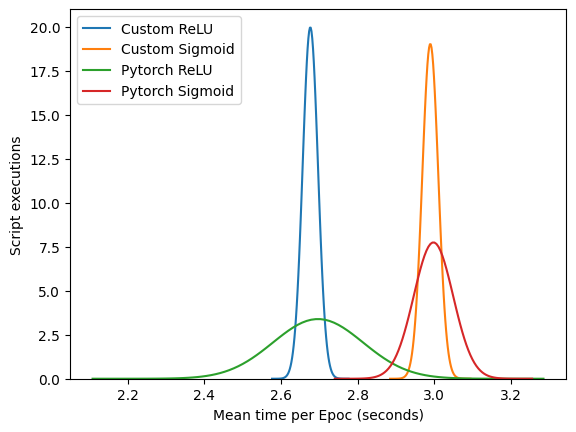

In [45]:
import matplotlib.pyplot as plt
import scipy.stats as stats

chartData = []
for prog in timings:
	chartData = chartData +  prog.tolist()

chartData2 = []
for prog in timingsB:
	chartData2 = chartData2 +  prog.tolist()

chartDataPytorchRelu = []
for prog in timingsPytorchRelu:
	chartDataPytorchRelu = chartData +  prog.tolist()

chartDataPytorchSigmoid = []
for prog in timingsPytorchSigmoid:
	chartDataPytorchSigmoid = chartData2 +  prog.tolist()

def plotMe(data, label):
	mu = np.mean(data)
	sigma = np.sqrt(np.var(data))
	x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
	plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label)

plotMe(chartData, A_name)
plotMe(chartData2, B_name)
plotMe(chartDataPytorchRelu, "Pytorch ReLU")
plotMe(chartDataPytorchSigmoid, "Pytorch Sigmoid")

plt.legend(loc="upper left")
plt.ylim(0, 21.0)
plt.xlabel('Mean time per Epoc (seconds)')
plt.ylabel('Script executions')

plt.show()

# Time for 30 Epochs distributions

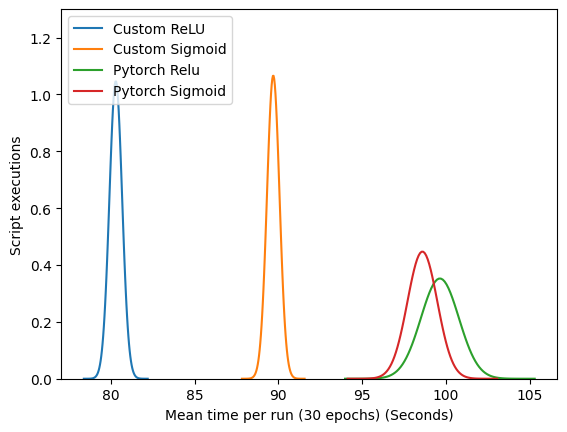

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats

chartData = []
for prog in timings:
	chartData.append(sum(prog.tolist()))

chartData2 = []
for prog in timingsB:
	chartData2.append(sum(prog.tolist()))

chartDataPytorchRelu = []
for prog in timingsPytorchRelu:
	chartDataPytorchRelu.append(sum(prog.tolist()))

chartDataPytorchSigmoid = []
for prog in timingsPytorchSigmoid:
	chartDataPytorchSigmoid.append(sum(prog.tolist()))

plotMe(chartData, A_name)
plotMe(chartData2, B_name)
plotMe(chartDataPytorchRelu, "Pytorch Relu")
plotMe(chartDataPytorchSigmoid, "Pytorch Sigmoid")

plt.legend(loc="upper left")
plt.ylim(0, 1.3)
plt.xlabel('Mean time per run (30 epochs) (Seconds)')
plt.ylabel('Script executions')

plt.show()

# Final precision distributions

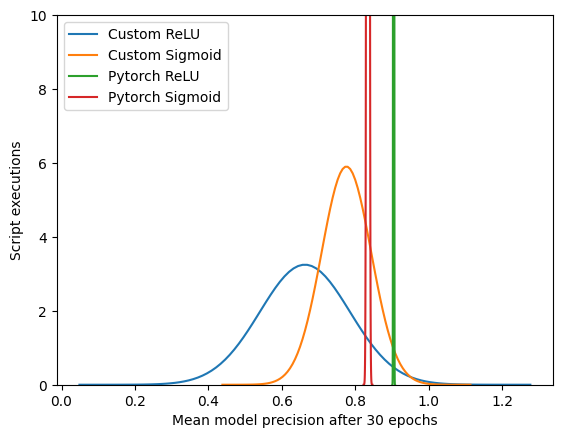

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats

chartData = []
for prog in progress:
	chartData.append(prog[-1])

chartData2 = []
for prog in progressB:
	chartData2.append(prog[-1])

chartDataPytorchRelu = []
for prog in progressPytorchRelu:
	chartDataPytorchRelu.append(prog[-1])

chartDataPytorchSigmoid = []
for prog in progressPytorchSigmoid:
	chartDataPytorchSigmoid.append(prog[-1])

plotMe(chartData, A_name)
plotMe(chartData2, B_name)
plotMe(chartDataPytorchRelu, "Pytorch ReLU")
plotMe(chartDataPytorchSigmoid, "Pytorch Sigmoid")

plt.legend(loc="upper left")
plt.ylim(0, 10)
plt.xlabel('Mean model precision after 30 epochs')
plt.ylabel('Script executions')

plt.show()

# Precision growth

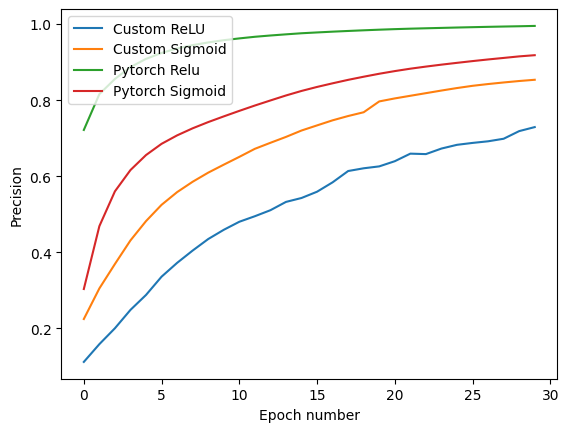

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def getGrowt(data):
	chartData = np.zeros(30)
	for prog in data:
		for val, i in zip(prog, range(0, 30)):
			chartData[i] += val
	chartData /= 30
	return chartData;

customReLUData = getGrowt(progress)
customSigmoidData = getGrowt(progressB)
pytorchReLUData = getGrowt(progressPytorchRelu)
pytorchSigmoidData = getGrowt(progressPytorchSigmoid)



def plotMe(data, label=""):
	#mu = np.mean(data)
	#sigma = np.sqrt(np.var(data))
	#x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
	plt.plot(data, label=label)

plotMe(customReLUData, A_name)
plotMe(customSigmoidData, B_name)
plotMe(pytorchReLUData, "Pytorch Relu")
plotMe(pytorchSigmoidData, "Pytorch Sigmoid")

plt.legend(loc="upper left")
plt.xlabel('Epoch number')
plt.ylabel('Model precision')

plt.show()